# Install the package

In [1]:
!pip install gtfs-segments@git+https://github.com/UTEL-UIUC/gtfs_segments --quiet

  Preparing metadata (setup.py) ... done


## Import the Dependencies

In [2]:
from gtfs_segments import *
from gtfs_segments.utils import *
from gtfs_segments.partridge_func import *
import warnings
warnings.filterwarnings('ignore')

# Fetch the latest data

In [3]:
sources_df = fetch_gtfs_source()
sources_df.head()

,provider,url,min_lat,max_lat,min_lon,max_lon
0,Casco Bay-Casco Bay Lines-ME,https://storage.googleapis.com/storage/v1/b/md...,43.655373,43.716190,-70.248666,-70.110180
1,Canton-St Lawrence County Public Transit-NY,https://storage.googleapis.com/storage/v1/b/md...,44.148476,44.979369,-75.756950,-74.611761
2,Honolulu-TheBus-HI,https://storage.googleapis.com/storage/v1/b/md...,21.255957,21.703270,-158.228463,-157.662429
3,Long Beach-Avalon Transit-CA,https://storage.googleapis.com/storage/v1/b/md...,33.326547,33.350836,-118.340356,-118.321860
4,"San Diego-San Diego International Airport, Met...",https://storage.googleapis.com/storage/v1/b/md...,32.542819,33.256887,-117.277924,-116.184458


In [4]:
sources_df = fetch_gtfs_source(place='SFMTA')
sources_df.head()

,provider,url,min_lat,max_lat,min_lon,max_lon
0,San Francisco-San Francisco Municipal Transpor...,https://storage.googleapis.com/storage/v1/b/md...,37.702085,37.829848,-122.510792,-122.365593


In [5]:
download_latest_data(sources_df,'data')

Downloaded the latest data


# Example -San Francisco (SFMTA/MUNI)

In [6]:
## Optionally you could use your own link to gtfs file
# url = 'https://transitfeeds.com/p/sfmta/60/latest/download'
# download_write_file(url,'data')

In [7]:
df = get_gtfs_segments('data/San Francisco-San Francisco Municipal Transportation Agency (SFMTA, Muni)-CA/gtfs.zip')
df.head()

,segment_id,route_id,direction_id,trip_id,traversals,distance,stop_id1,stop_id2,geometry
0,3546-3844-1,1,1.0,11108994,148.0,228.26,3546,3844,"LINESTRING (-122.49251 37.78342, -122.49252 37..."
1,3547-3549-1,1,0.0,11108810,148.0,178.64,3547,3549,"LINESTRING (-122.49251 37.78342, -122.49251 37..."
2,3548-3546-1,1,1.0,11108994,148.0,159.04,3548,3546,"LINESTRING (-122.49241 37.78199, -122.49241 37..."
3,3549-3550-1,1,0.0,11108810,148.0,209.16,3549,3550,"LINESTRING (-122.49240 37.78181, -122.49239 37..."
4,3550-4277-1,1,0.0,11108810,148.0,85.67,3550,4277,"LINESTRING (-122.49226 37.77993, -122.49225 37..."


In [8]:
_,feed = get_bus_feed('data/San Francisco-San Francisco Municipal Transportation Agency (SFMTA, Muni)-CA/gtfs.zip')
get_route_stats(feed)

,route,direction,route length,total time,headway,average speed,n bus avg,spacing,stop spacing
0,25,0.0,8.84,0.20,0.27,44.20,1.000,8.840,0.98
1,25,1.0,7.77,0.28,0.26,27.75,1.208,6.432,1.11
2,48,1.0,14.32,0.77,0.28,18.60,2.905,4.929,0.20
3,48,0.0,14.66,0.93,0.27,15.76,2.926,5.010,0.21
4,14R,0.0,13.47,0.85,0.20,15.85,5.702,2.362,0.61
...,...,...,...,...,...,...,...,...,...
123,39,1.0,2.83,0.27,0.33,10.48,1.000,2.830,0.13
124,N-OWL,0.0,15.64,0.80,0.50,19.55,1.553,10.071,0.30
125,N-OWL,1.0,15.89,0.77,0.50,20.64,1.571,10.115,0.30
126,NBUS,1.0,15.77,1.00,0.33,15.77,1.222,12.905,0.33


In [9]:
summary_stats(df)

Using max_spacing =  3000


,0
Segment Weighted Mean,274.950
Route Weighted Mean,278.900
Traversal Weighted Mean,276.775
Segment Weighted Median,210.440
Route Weighted Median,224.760
Traversal Weighted Median,222.690
Traversal Weighted Std,217.298
Traversal Weighted 25 % Quantile,167.960
Traversal Weighted 50 % Quantile,222.690
Traversal Weighted 75 % Quantile,309.630


In [10]:
df

,segment_id,route_id,direction_id,trip_id,traversals,distance,stop_id1,stop_id2,geometry
0,3546-3844-1,1,1.0,11108994,148.0,228.26,3546,3844,"LINESTRING (-122.49251 37.78342, -122.49252 37..."
1,3547-3549-1,1,0.0,11108810,148.0,178.64,3547,3549,"LINESTRING (-122.49251 37.78342, -122.49251 37..."
2,3548-3546-1,1,1.0,11108994,148.0,159.04,3548,3546,"LINESTRING (-122.49241 37.78199, -122.49241 37..."
3,3549-3550-1,1,0.0,11108810,148.0,209.16,3549,3550,"LINESTRING (-122.49240 37.78181, -122.49239 37..."
4,3550-4277-1,1,0.0,11108810,148.0,85.67,3550,4277,"LINESTRING (-122.49226 37.77993, -122.49225 37..."
...,...,...,...,...,...,...,...,...,...
5152,7382-3104-1,TBUS,1.0,11162249,5.0,396.49,7382,3104,"LINESTRING (-122.38885 37.76419, -122.38885 37..."
5153,7405-5235-1,TBUS,0.0,11162244,3.0,553.03,7405,5235,"LINESTRING (-122.39393 37.77625, -122.39397 37..."
5154,7447-4508-1,TBUS,0.0,11162244,3.0,738.04,7447,4508,"LINESTRING (-122.38805 37.78456, -122.38805 37..."
5155,7520-3793-1,TBUS,0.0,11162244,3.0,128.38,7520,3793,"LINESTRING (-122.40474 37.70965, -122.40471 37..."


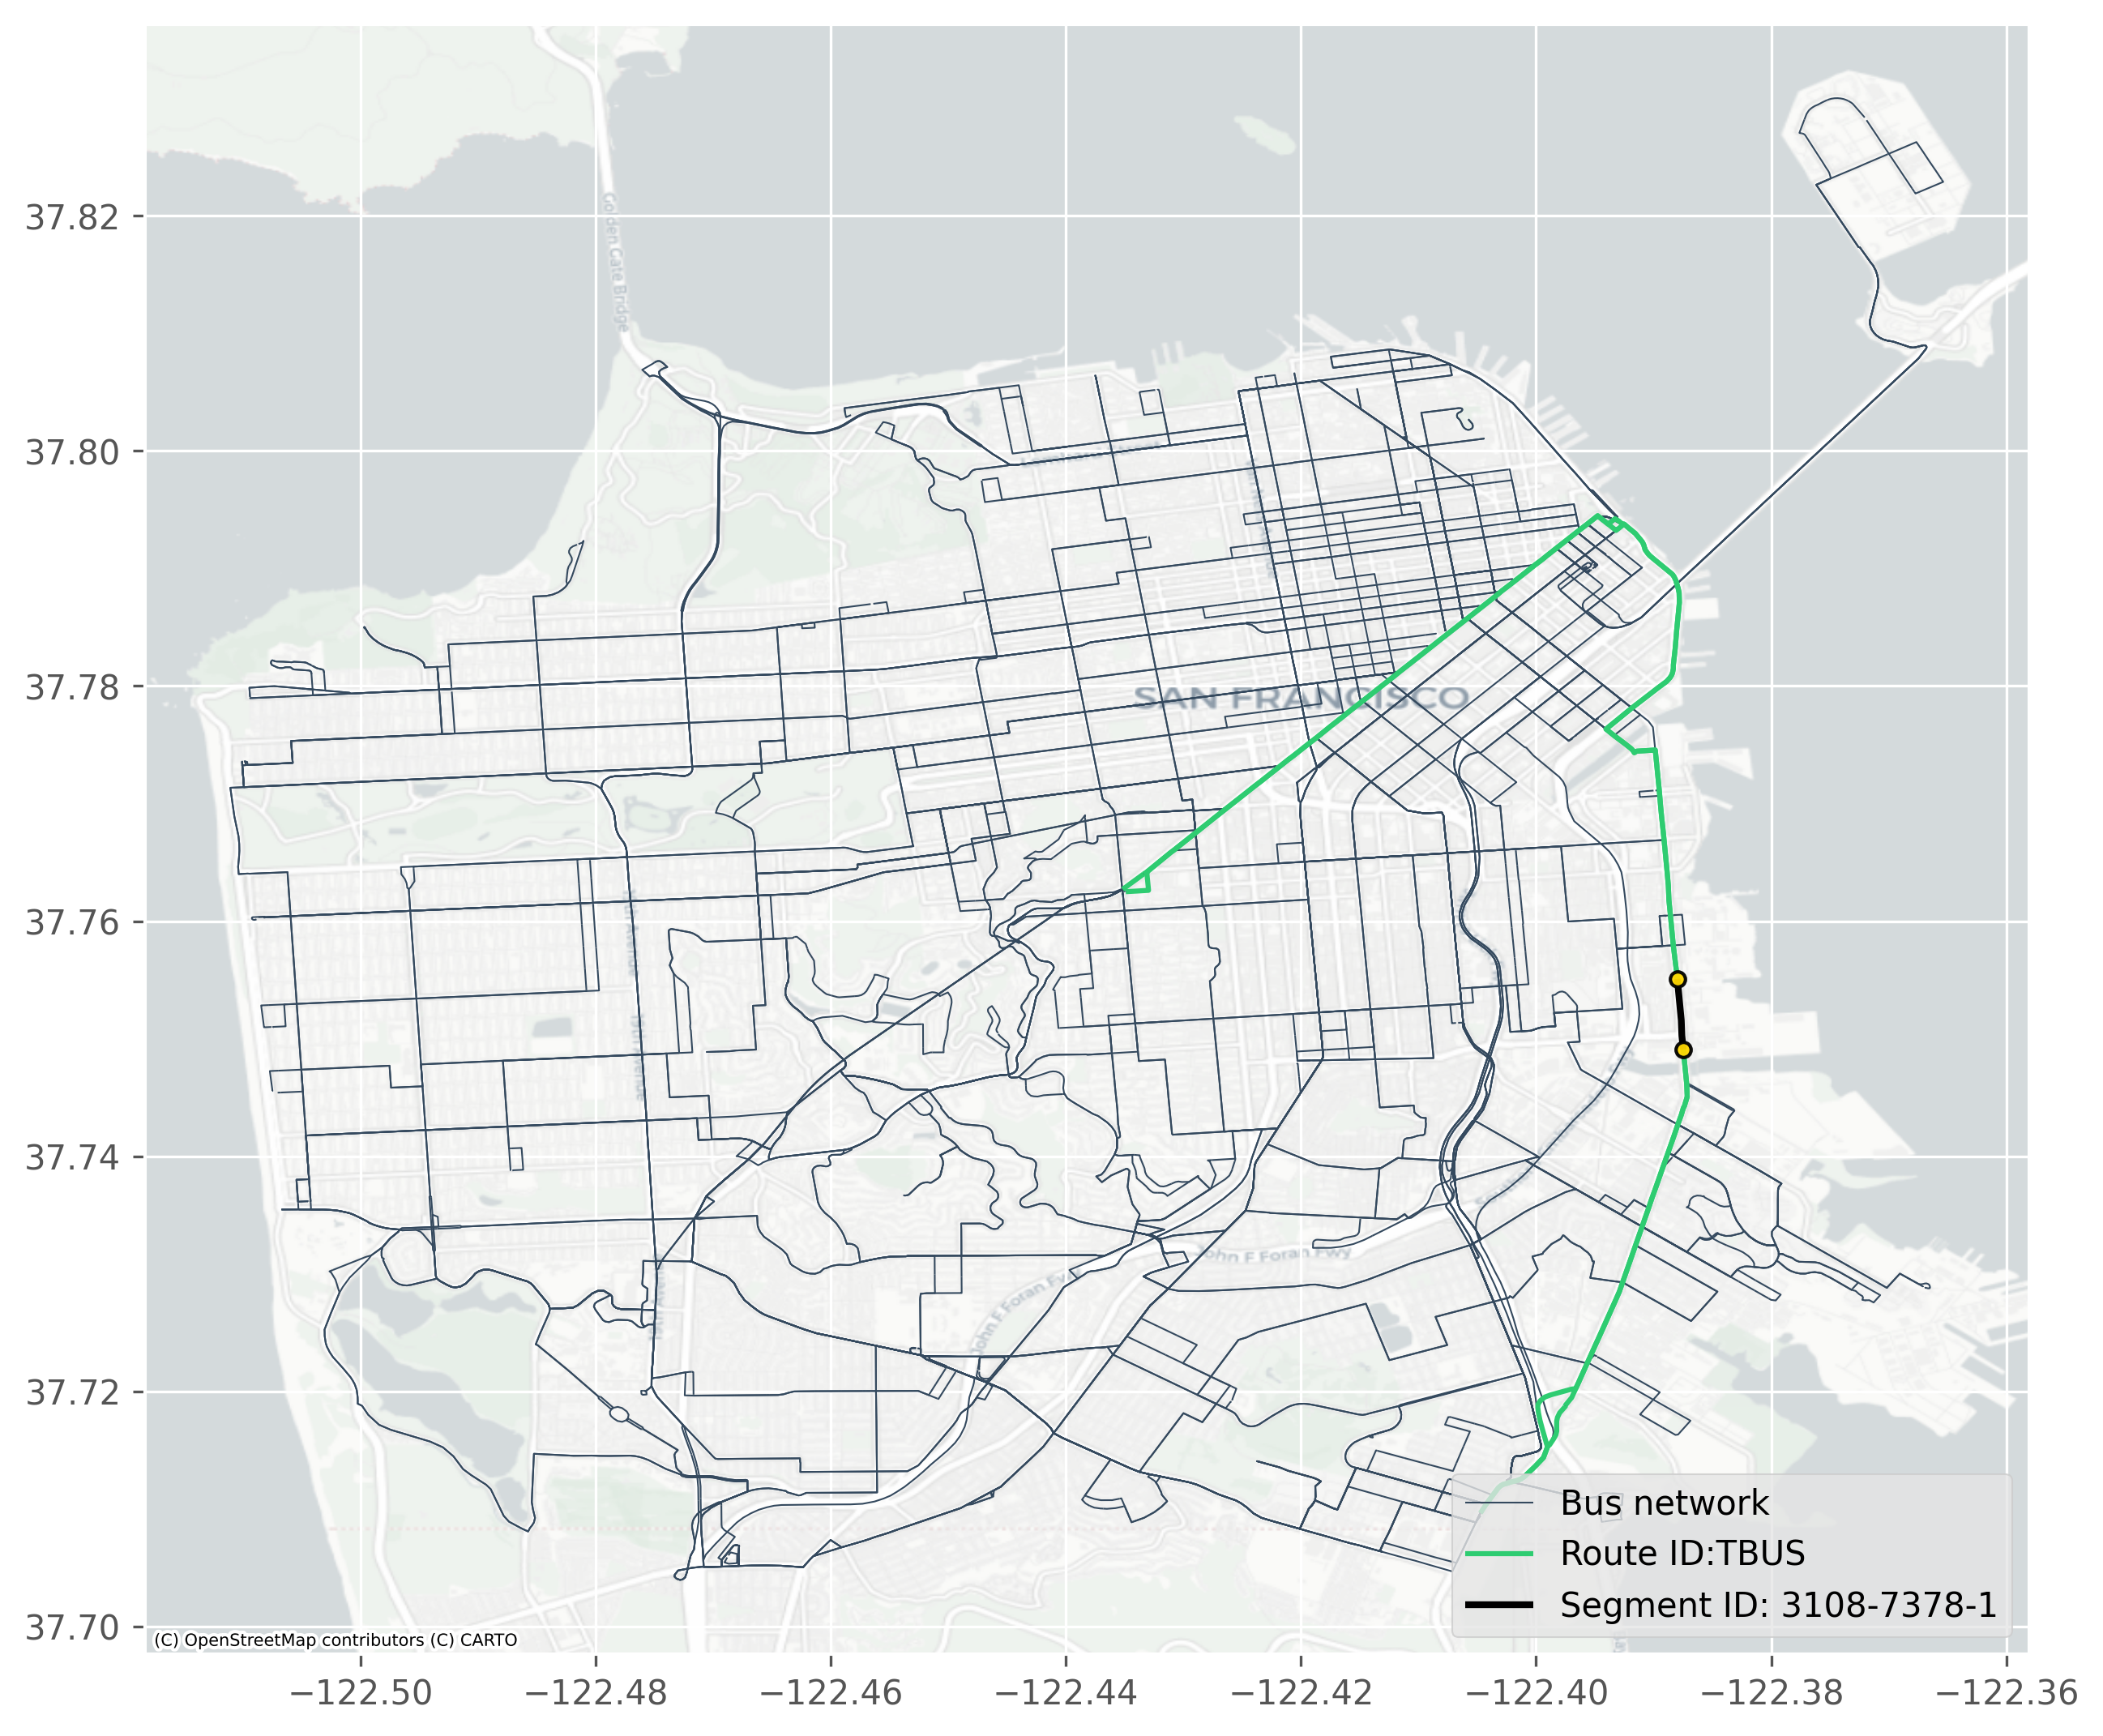

In [11]:
view_spacings(df,route = 'TBUS',segment = '3108-7378-1',basemap=True, show_stops= True)

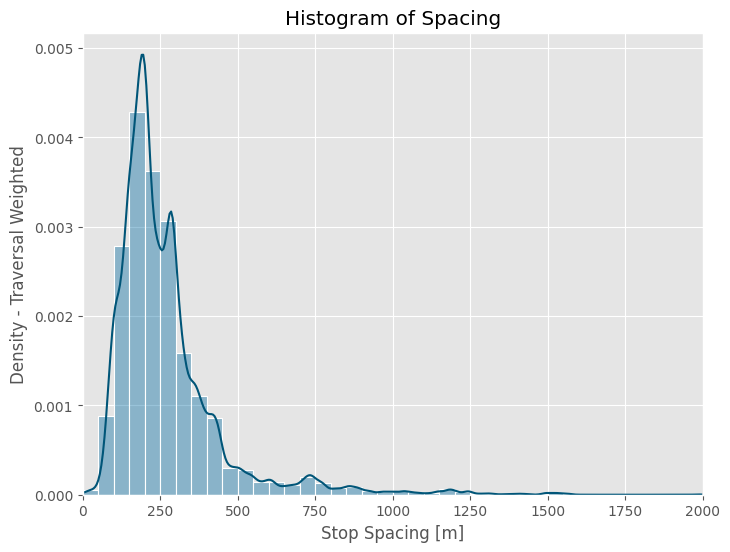

In [12]:
plot_hist(df, max_spacing =2000)

In [13]:
export_segments(df,'sfmta_spacings', output_format ='csv',geometry = False)

In [14]:
# Save in a folder
# Alternatively use os.path.join()
export_segments(df,'data/sfmta_spacings', output_format ='geojson')